In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("mall.csv")

In [5]:
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [6]:
df.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

In [7]:
df.shape

(303, 2)

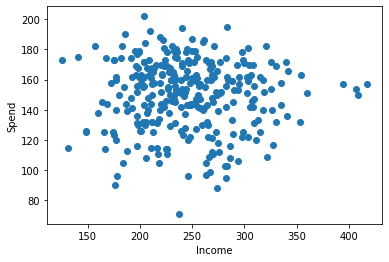

In [8]:
plt.scatter(df["INCOME"],df["SPEND"])
plt.xlabel("Income")
plt.ylabel("Spend")
plt.show()

In [9]:
from sklearn.cluster import KMeans

In [10]:
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[["INCOME","SPEND"]])
    sse.append(km.inertia_)

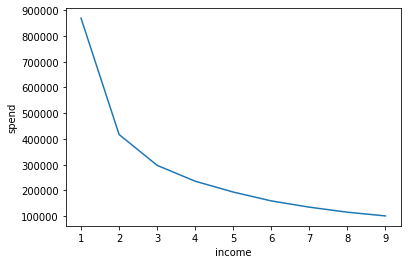

In [11]:
plt.xlabel('income')
plt.ylabel('spend')
plt.plot(k_range,sse)
plt.show()

In [12]:
km=KMeans(n_clusters=3)

In [13]:
km.fit_predict(df[["INCOME","SPEND"]])

array([0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       2, 0, 2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1,

In [14]:
Y_predict=km.fit_predict(df[["INCOME","SPEND"]])

In [15]:
df['clusters']=Y_predict

In [16]:
df.head()

,INCOME,SPEND,clusters
0,233,150,0
1,250,187,0
2,204,172,1
3,236,178,0
4,354,163,2


In [17]:
km.cluster_centers_

array([[251.61764706, 149.31617647],
       [196.68224299, 150.57943925],
       [317.55      , 148.73333333]])

In [18]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]

In [19]:
df1.head()

,INCOME,SPEND,clusters
0,233,150,0
1,250,187,0
3,236,178,0
7,263,173,0
10,239,160,0


In [20]:
df2.head()

,INCOME,SPEND,clusters
2,204,172,1
5,192,148,1
8,199,162,1
9,168,174,1
13,211,144,1


In [21]:
df3.head()

,INCOME,SPEND,clusters
4,354,163,2
6,294,153,2
16,340,172,2
25,302,162,2
28,417,157,2


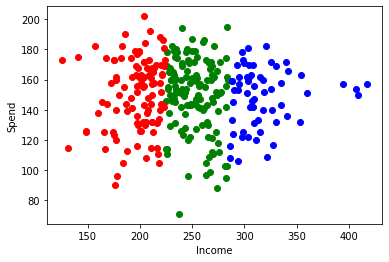

In [22]:
plt.scatter(df1["INCOME"],df1["SPEND"],color='green')
plt.scatter(df2["INCOME"],df2["SPEND"],color='red')
plt.scatter(df3["INCOME"],df3["SPEND"],color='blue')
plt.xlabel("Income")
plt.ylabel("Spend")
plt.show()

In [23]:
km.cluster_centers_[:,0]

array([251.61764706, 196.68224299, 317.55      ])

In [24]:
km.cluster_centers_[:,1]

array([149.31617647, 150.57943925, 148.73333333])

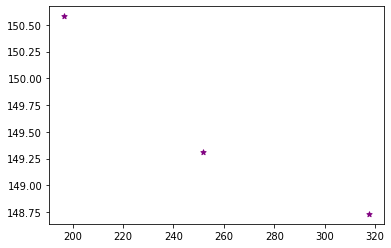

In [25]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid',s=30)
plt.show()

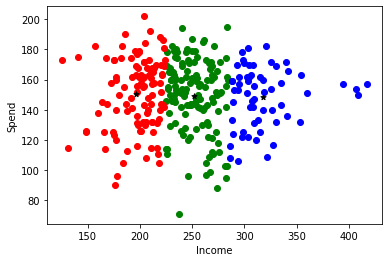

In [26]:
plt.scatter(df1["INCOME"],df1["SPEND"],color='green')
plt.scatter(df2["INCOME"],df2["SPEND"],color='red')
plt.scatter(df3["INCOME"],df3["SPEND"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid',s=30)
plt.xlabel("Income")
plt.ylabel("Spend")
plt.show()